In [1]:
from Model import *

In [2]:
ds = DataSet()
X, y, classes, labels, idx, labels_r, X_train, y_train, X_test, y_test = ds.load_data()
print(labels)
print(labels_r)
print(idx)
print(len(X_train), len(X_test), len(y_train), len(y_test))

Loading Data


100%|██████████████████████████| 42000/42000 [00:01<00:00, 39005.92it/s]


Data Loaded
Creating Labels from the Classes


100%|███████████████████████████████| 10/10 [00:00<00:00, 315361.20it/s]


Created Labels from the Classes
Converting Data -> X,y + train,test
{1: 1, 7: 2, 3: 3, 9: 4, 2: 5, 6: 6, 0: 7, 4: 8, 8: 9, 5: 10}
{1: 1, 2: 7, 3: 3, 4: 9, 5: 2, 6: 6, 7: 0, 8: 4, 9: 8, 10: 5}
10
31500 10500 31500 10500


In [3]:
model = CNN(idx_of_classes=idx).to(DEVICE)
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

In [ ]:
hp = Help_Funcs()
(
    PROJECT_NAME,
    name,
    epochs,
    X_train,
    y_train,
    X_test,
    y_test,
    batch_size,
    device,
    model,
    criterion,
    optimizer,
) = hp.train(
    PROJECT_NAME,
    "BaseLine CNN",
    125,
    X_train.view(-1, 1, 28, 28).to(DEVICE),
    y_train.to(DEVICE),
    X_test.view(-1, 1, 28, 28),
    y_test.to(DEVICE),
    BATCH_SIZE,
    DEVICE,
    model,
    criterion,
    optimizer,
    labels_r,
)

wandb: Currently logged in as: ranuga-d (use `wandb login --relogin` to force relogin)
RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd


  0%|                                           | 0/125 [00:00<?, ?it/s]
12it [00:00, 20100.50it/s]

0it [00:00, ?it/s]
2797it [00:00, 27949.04it/s]
5767it [00:00, 28901.48it/s]
10500it [00:00, 28572.05it/s][A
  1%|▎                                  | 1/125 [00:04<09:01,  4.37s/it]
12it [00:00, 10265.48it/s]

0it [00:00, ?it/s]
2777it [00:00, 27766.92it/s]
5702it [00:00, 28637.85it/s]
10500it [00:00, 28324.16it/s][A
  2%|▌                                  | 2/125 [00:08<08:55,  4.36s/it]
12it [00:00, 11295.25it/s]

0it [00:00, ?it/s]
2618it [00:00, 26174.53it/s]
5380it [00:00, 26968.55it/s]
10500it [00:00, 26520.31it/s][A
  2%|▊                                  | 3/125 [00:13<08:54,  4.38s/it]
12it [00:00, 14777.35it/s]

0it [00:00, ?it/s]
2815it [00:00, 28142.38it/s]
5630it [00:00, 27879.66it/s]
10500it [00:00, 27941.43it/s][A
  3%|█                                  | 4/125 [00:17<09:10,  4.55s/it]
12it [00:00, 6162.81it/s]

0it [00:00, ?it/s]
2841it [00:00, 28404.95it/s]
5682it [00:0

In [10]:
img = cv2.imread(f'./Model/tests/{os.listdir("./Model/tests/")[0]}')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
img = img / 255.0

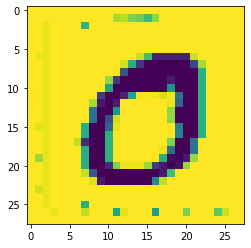

In [11]:
plt.imshow(img)

In [20]:
model.eval()
img = torch.tensor(img).view(-1,1,28,28).float().to('cuda')
with torch.no_grad():
    pred = model(img)

/tmp/ipykernel_158809/2105470809.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(img).view(-1,1,28,28).float().to('cuda')


RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

In [19]:
pred

tensor([[2.8385e-04, 6.0652e-04, 1.0208e-03, 2.9056e-02, 2.2125e-03, 4.2019e-06,
         6.0490e-03, 3.0691e-04, 9.5992e-01, 5.3709e-04]], device='cuda:0')

In [14]:
labels_r[int(torch.argmax(pred[0]))]

4